Womanium Quantum + AI 2024

Exponential quantum speedup in simulating coupled classical oscillators

In [7]:
from classiq import qfunc, CReal, QBit, allocate, RX, RY, QArray, synthesize, show, QNum, Output, create_model, execute, CX
from matplotlib import pyplot as plt
import numpy as np

In [5]:
import classiq
classiq.authenticate(overwrite=True)

Your user code: LFNC-MQDB
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=LFNC-MQDB


Implementing the toy model with 2 oscillators

In [8]:
@qfunc 
def apply_model(disp:CReal, velo:CReal, a: QArray, b:QArray) -> None:
    m = 0.5
    k = 0.3
    T = 0.5 * k * disp**2
    V = 0.5 * m * velo**2
    alpha = 1.0
    print(T)
    print(V)
    T_a = np.sqrt(T) * alpha
    V_a = np.sqrt(V) * alpha
    RX(T_a, a[0])

    RX(T_a, b[0])

    RY(V_a, a[0])

    RY(V_a, b[0])
    
    CX(a[0], b[0])
    CX(b[0], a[0])


In [3]:
@qfunc
def main() -> None:
    a = QNum("a")
    b = QNum("b")
    allocate(1, a)
    allocate(1, b)
    displacement = 0.05
    velocity = 2
    apply_model(displacement, velocity, a, b)


In [6]:
program = synthesize(create_model(main))
show(program)

0.15 * ((disp) ** 2)
0.25 * ((velo) ** 2)


TypeError: loop of ufunc does not support argument 0 of type SymbolicExpr which has no callable sqrt method

{'1010': 2, '0110': 1, '0101': 6, '1100': 6, '1001': 2, '1000': 30, '0011': 1, '0001': 125, '0010': 43, '0000': 1722, '0100': 110}


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

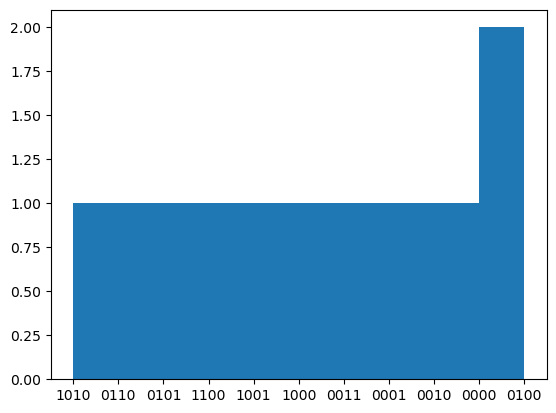

In [60]:
job = execute(program)
result = job.result()[0].value.counts
print(result)

<BarContainer object of 11 artists>

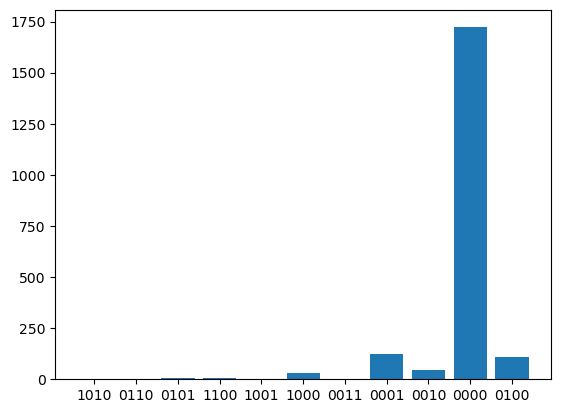

In [61]:
keys = list(result.keys())
values = list(result.values())
plt.bar(keys, values)